<a href="https://colab.research.google.com/github/RobDBennett/DS-Unit-1-Build/blob/master/SteamDataShaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Research Question:
##How do people spend their time on Steam?
Often times I see a game advertised (usually on a sale, or friends have hyped up), and I'll buy it. And then stop playing it almost immediately in favor of an 'old classic'. How many people share this tendency?

For me personally, this is a trend that I noticed long ago and I've tried to curb it but it's tricky. There is just something satifying about buying a new game, and yet I find that I play my 'old favorites' far more than these new experiences. Wanting to understand if this is a known part of the business model of Steam or just a quirk I had, I looked for a some data on the subject.

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
column_headers= ['id','game','purchase','hours','0']


Saving steam-200k.csv to steam-200k (1).csv


In [2]:
games = pd.read_csv('steam-200k.csv', header=None,names=column_headers)
print(games.shape)
games.head()

(200000, 5)


,id,game,purchase,hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [0]:
games = games.drop(['0'], axis=1)

In [4]:
uploaded= files.upload()

Saving steam.csv to steam (1).csv


In [5]:
steam = pd.read_csv('steam.csv')
print(steam.shape)
steam.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [6]:
steam = steam.drop(['english','developer','publisher','platforms','required_age',
                    'categories','steamspy_tags','achievements','owners',
                    'appid','average_playtime','median_playtime'],axis=1)
steam.head()

,name,release_date,genres,positive_ratings,negative_ratings,price
0,Counter-Strike,2000-11-01,Action,124534,3339,7.19
1,Team Fortress Classic,1999-04-01,Action,3318,633,3.99
2,Day of Defeat,2003-05-01,Action,3416,398,3.99
3,Deathmatch Classic,2001-06-01,Action,1273,267,3.99
4,Half-Life: Opposing Force,1999-11-01,Action,5250,288,3.99


In [7]:
steam = steam.rename(columns={'name':'game','release_date':'release','genres':'genre','positive_ratings':'pos_rate','negative_ratings':'neg_rate','price':'price'})
steam.head()

,game,release,genre,pos_rate,neg_rate,price
0,Counter-Strike,2000-11-01,Action,124534,3339,7.19
1,Team Fortress Classic,1999-04-01,Action,3318,633,3.99
2,Day of Defeat,2003-05-01,Action,3416,398,3.99
3,Deathmatch Classic,2001-06-01,Action,1273,267,3.99
4,Half-Life: Opposing Force,1999-11-01,Action,5250,288,3.99


In [8]:
total = pd.merge(games, steam, on='game',how='inner')
print(total.shape)
total.head()

(92883, 9)


,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
0,151603712,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99
1,151603712,Fallout 4,play,87.0,2015-11-09,RPG,110376,45377,19.99
2,87445402,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99
3,87445402,Fallout 4,play,83.0,2015-11-09,RPG,110376,45377,19.99
4,25096601,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99


In [0]:
test = total.replace('purchase', np.nan)

In [11]:
test = test.dropna()
test

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
1,151603712,Fallout 4,play,87.0,2015-11-09,RPG,110376,45377,19.99
3,87445402,Fallout 4,play,83.0,2015-11-09,RPG,110376,45377,19.99
5,25096601,Fallout 4,play,1.6,2015-11-09,RPG,110376,45377,19.99
7,211925330,Fallout 4,play,133.0,2015-11-09,RPG,110376,45377,19.99
9,115396529,Fallout 4,play,17.9,2015-11-09,RPG,110376,45377,19.99
...,...,...,...,...,...,...,...,...,...
92873,112739159,Ride! Carnival Tycoon,play,0.3,2008-07-29,Simulation,15,26,4.99
92875,116564064,SAMURAI WARRIORS 4-II,play,2.2,2015-09-29,Action,757,215,39.99
92877,116564064,The Bug Butcher,play,0.3,2016-01-19,Action;Indie,939,92,5.59
92880,135400225,Life is Hard,play,3.1,2015-11-03,Adventure;Indie;Simulation;Strategy;Early Access,339,132,5.99


This is pretty exciting now that I've shaped this a bit. The important data that I am left with is the user, the game title, if they purchased it (which now that I've used the purchase column to pull out the 1.0 values from the hours for games they purchased, I don't really need this column anymore at all), the release date, genre, some of the ratings, the median playtime for the average user, and the price of the game in question. I'm pretty pleased with how this game out.
I should note that the original dataset had 200k rows, and now I'm down to 36k, which is still enough to run some interesting thought models, but I know that we lost many rows that didn't have titles that my other steam data had. Just something to bear in mind.


In [0]:
test.to_csv ('steamproject.csv')

In other notebooks I might pull up this file directly, but that's the file of my more or less completed dataframe. Lets do some visualizations with it.

In [13]:
test['game'].value_counts().head(10)

Dota 2             4841
Team Fortress 2    2323
Unturned           1069
Left 4 Dead 2       801
Garry's Mod         666
Counter-Strike      568
Terraria            460
Portal 2            453
Warframe            424
Portal              417
Name: game, dtype: int64

In [14]:
dota = test.loc[test['game'] == 'Dota 2']
dota['hours'].mean()

202.78549886387088

In [15]:
tf2 = test.loc[test['game'] == 'Team Fortress 2']
tf2['hours'].mean()

74.76250538097285

In [16]:
unturn = test.loc[test['game'] == 'Unturned']
unturn['hours'].mean()

15.057436856875599

In [17]:
l4d2 = test.loc[test['game'] == 'Left 4 Dead 2']
l4d2['hours'].mean()

41.943445692883884

In [18]:
garry = test.loc[test['game'] == "Garry's Mod"]
garry['hours'].mean()

74.66261261261265

In [19]:
counter = test.loc[test['game'] == 'Counter-Strike']
counter['hours'].mean()

236.37517605633803

In [20]:
terr = test.loc[test['game'] == 'Terraria']
terr['hours'].mean()

65.11260869565214

In [21]:
portal2 = test.loc[test['game'] == 'Portal 2']
portal2['hours'].mean()

20.126048565121405

In [22]:
warframe = test.loc[test['game'] == 'Warframe']
warframe['hours'].mean()

63.85518867924527

In [23]:
portal = test.loc[test['game'] == 'Portal']
portal['hours'].mean()

5.474340527577937

In [0]:
data = {'game': ['Dota 2', 'Team Fortress 2', 'Unturned', 'Left 4 Dead 2',
                 "Garry's Mod",'Counter-Strike','Terraria','Portal 2',
                 'Warframe','Portal'],
        'players': [4841, 2323, 1069, 801, 666, 568, 460, 453, 424, 417],
        'mean': [202.79, 74.76, 15.06, 41.94, 76.66,236.38,65.11,20.13,63.86,5.47]}
vis_top_10 = pd.DataFrame(data, columns=['game','players','mean'])


In [25]:
comp10 = pd.merge(vis_top_10, test.drop(['id','purchase','hours'], axis=1), 
                  on='game',how='left')
comp10 = comp10.drop_duplicates()
comp10

,game,players,mean,release,genre,pos_rate,neg_rate,price
0,Dota 2,4841,202.79,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.00
4841,Team Fortress 2,2323,74.76,2007-10-10,Action;Free to Play,515879,34036,0.00
7164,Unturned,1069,15.06,2017-07-07,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00
8233,Left 4 Dead 2,801,41.94,2009-11-19,Action,251789,8418,7.19
9034,Garry's Mod,666,76.66,2006-11-29,Indie;Simulation,363721,16433,6.99
9700,Counter-Strike,568,236.38,2000-11-01,Action,124534,3339,7.19
10268,Terraria,460,65.11,2011-05-16,Action;Adventure;Indie;RPG,255600,7797,6.99
10728,Portal 2,453,20.13,2011-04-18,Action;Adventure,138220,1891,7.19
11181,Warframe,424,63.86,2013-03-25,Action;Free to Play,226541,20268,0.00
11605,Portal,417,5.47,2007-10-10,Action,51801,1080,7.19


In [0]:
comp10.to_csv('comp_top10_played')

I am pretty sure that there are easier ways to do this, but this wasn't too bad.

So, the the above is for the top 10 most played games, but it doesn't count for anything that was 'purchased'. So lets run more or less the same process only this time let's just look for the 'purchased' columns. 

In [27]:
bought = total.loc[total['purchase'] == 'purchase']
bought.head()

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
0,151603712,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99
2,87445402,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99
4,25096601,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99
6,211925330,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99
8,115396529,Fallout 4,purchase,1.0,2015-11-09,RPG,110376,45377,19.99


In [28]:
print(bought.shape)
bought['game'].value_counts().head(10)

(56581, 9)


Dota 2               4841
Team Fortress 2      2323
Unturned             1563
Left 4 Dead 2         951
Counter-Strike        856
Warframe              847
Garry's Mod           731
Robocraft             689
Heroes & Generals     658
Half-Life 2           639
Name: game, dtype: int64

In [29]:
dota.sort_values('hours')

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
10186,142183287,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
17948,193092714,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
11964,193012627,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
10280,242469861,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
17130,138578560,Dota 2,play,0.1,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
...,...,...,...,...,...,...,...,...,...
15194,86256882,Dota 2,play,6015.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
15842,121199670,Dota 2,play,6753.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
18578,52567955,Dota 2,play,6964.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0
17696,130882834,Dota 2,play,7765.0,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.0


In [30]:
dota['hours'].median()

5.5

In [31]:
tf2['hours'].median()

4.4

In [32]:
unturn['hours'].median()

3.5

In [33]:
l4d2['hours'].median()

10.5

In [34]:
garry['hours'].median()

17.25

In [35]:
counter['hours'].median()

8.8

In [36]:
terr['hours'].median()

20.35

In [37]:
portal2['hours'].median()

10.8

In [38]:
warframe['hours'].median()

5.85

In [39]:
portal['hours'].median()

3.2

In [40]:
median = [5.5, 4.4, 3.5, 10.5,17.25,8.8,20.35,10.8,5.85,3.2]
comp10['median'] = median
comp10

,game,players,mean,release,genre,pos_rate,neg_rate,price,median
0,Dota 2,4841,202.79,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.00,5.50
4841,Team Fortress 2,2323,74.76,2007-10-10,Action;Free to Play,515879,34036,0.00,4.40
7164,Unturned,1069,15.06,2017-07-07,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00,3.50
8233,Left 4 Dead 2,801,41.94,2009-11-19,Action,251789,8418,7.19,10.50
9034,Garry's Mod,666,76.66,2006-11-29,Indie;Simulation,363721,16433,6.99,17.25
9700,Counter-Strike,568,236.38,2000-11-01,Action,124534,3339,7.19,8.80
10268,Terraria,460,65.11,2011-05-16,Action;Adventure;Indie;RPG,255600,7797,6.99,20.35
10728,Portal 2,453,20.13,2011-04-18,Action;Adventure,138220,1891,7.19,10.80
11181,Warframe,424,63.86,2013-03-25,Action;Free to Play,226541,20268,0.00,5.85
11605,Portal,417,5.47,2007-10-10,Action,51801,1080,7.19,3.20


In [0]:
comp10.to_csv('comp_top10_played.csv')

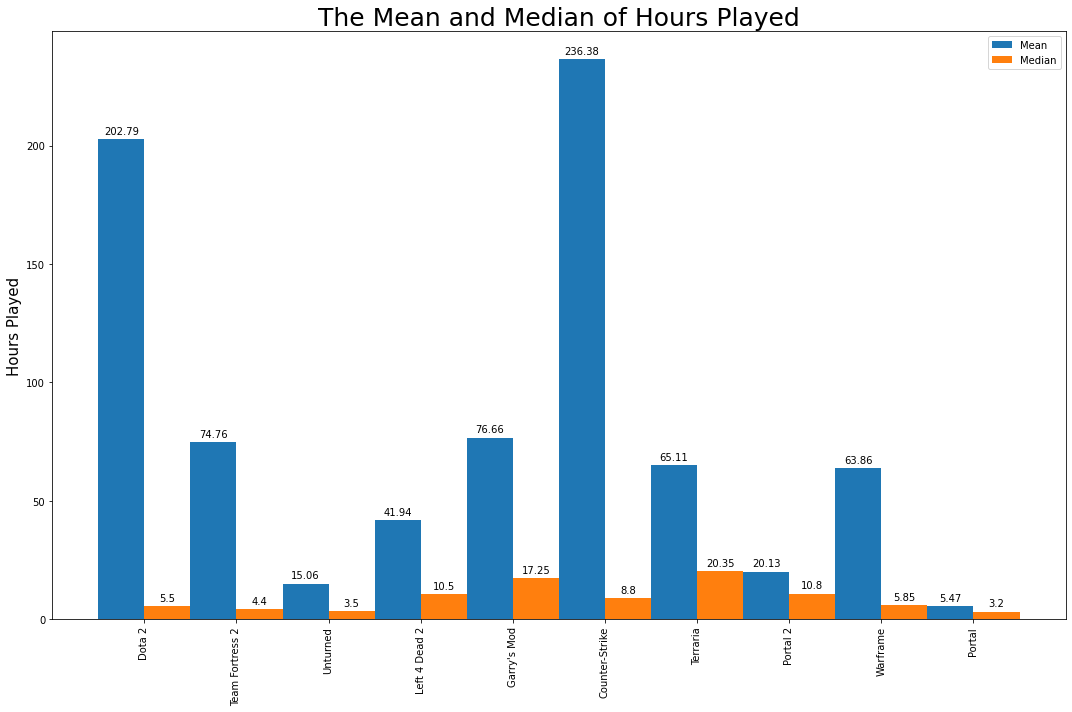

In [46]:
import matplotlib.pyplot as plt

labels = list(comp10['game'])
means = list(comp10['mean'])
median = list(comp10['median'])
x = np.arange(len(labels))
width = 0.5 
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, median, width, label='Median')
ax.set_ylabel('Hours Played', fontsize=15)
ax.set_title('The Mean and Median of Hours Played', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

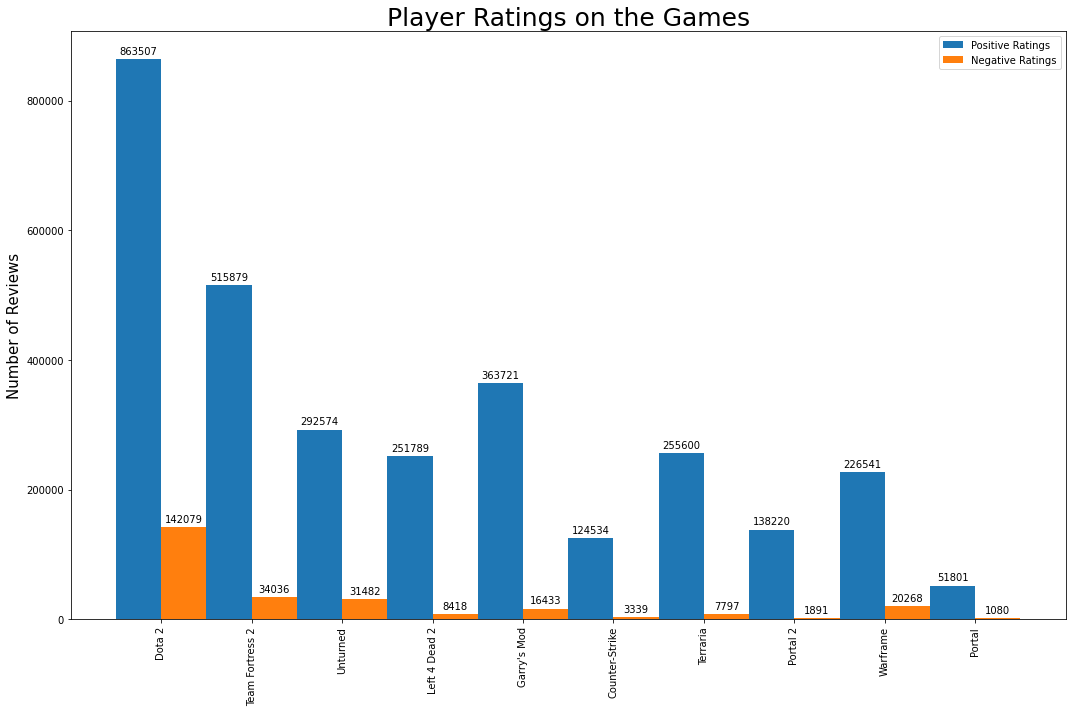

In [47]:
pos = list(comp10['pos_rate'])
neg = list(comp10['neg_rate'])
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, pos, width, label='Positive Ratings')
rects2 = ax.bar(x + width/2, neg, width, label='Negative Ratings')

ax.set_ylabel('Number of Reviews', fontsize=15)
ax.set_title('Player Ratings on the Games', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [0]:
import datetime
date = comp10
date['dates_parsed'] = pd.to_datetime(date['release'], infer_datetime_format=True)
date['year'] = pd.DatetimeIndex(date['dates_parsed']).year
date= date.drop(['release','dates_parsed'], axis=1)

In [49]:
date

,game,players,mean,genre,pos_rate,neg_rate,price,median,year
0,Dota 2,4841,202.79,Action;Free to Play;Strategy,863507,142079,0.00,5.50,2013
4841,Team Fortress 2,2323,74.76,Action;Free to Play,515879,34036,0.00,4.40,2007
7164,Unturned,1069,15.06,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00,3.50,2017
8233,Left 4 Dead 2,801,41.94,Action,251789,8418,7.19,10.50,2009
9034,Garry's Mod,666,76.66,Indie;Simulation,363721,16433,6.99,17.25,2006
9700,Counter-Strike,568,236.38,Action,124534,3339,7.19,8.80,2000
10268,Terraria,460,65.11,Action;Adventure;Indie;RPG,255600,7797,6.99,20.35,2011
10728,Portal 2,453,20.13,Action;Adventure,138220,1891,7.19,10.80,2011
11181,Warframe,424,63.86,Action;Free to Play,226541,20268,0.00,5.85,2013
11605,Portal,417,5.47,Action,51801,1080,7.19,3.20,2007


In [50]:
games['game'].value_counts().head(30)

Dota 2                                          9682
Team Fortress 2                                 4646
Counter-Strike Global Offensive                 2789
Unturned                                        2632
Left 4 Dead 2                                   1752
Counter-Strike Source                           1693
Counter-Strike                                  1424
Garry's Mod                                     1397
The Elder Scrolls V Skyrim                      1394
Warframe                                        1271
Half-Life 2 Lost Coast                          1158
Sid Meier's Civilization V                      1150
Robocraft                                       1096
Half-Life 2 Deathmatch                          1021
Portal                                          1005
Portal 2                                         997
Half-Life 2                                      995
Heroes & Generals                                993
Terraria                                      

In [51]:
steam.isin(['Counter-Strike: Global Offensive']).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

Alright, so I caught a dangerous mistake way up top. My original merge lost a good bit of rows due to the 'inner' merge function. I didn't think much of it at the time, but now I know that represents a good bit of data. With this above test, I can see that not *all* of the game titles are universal, so I am going to have to go through this list above. Since I am testing for the *top ten* game results, I'm not going to go through this entire list methodically, though I have a means to do so now. It seems that there are going to be minor differences in some games and that's a slanting problem. Mostly for games that have sequel-like titles. Either way, I'll go through the top 15-20 games (which is going to be time consuming) to ensure that the merge retains as much viable data as possible. If we lose some of the poorer performers, that shouldn't affect my results.

In [0]:
steam = steam.replace('Counter-Strike: Global Offensive', 'Counter-Strike Global Offensive')

In [53]:
steam.isin(['Counter-Strike: Source']).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [0]:
steam = steam.replace('Counter-Strike: Source', 'Counter-Strike Source')

In [55]:
steam.isin(['The Elder Scrolls V: Skyrim']).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [0]:
steam = steam.replace('The Elder Scrolls V: Skyrim', 'The Elder Scrolls V Skyrim')

In [57]:
steam.isin(['Half-Life 2: Lost Coast']).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [0]:
steam = steam.replace('Half-Life 2: Lost Coast', 'Half-Life 2 Lost Coast')

In [59]:
steam[steam['game'].str.contains("Sid Meier")]

,game,release,genre,pos_rate,neg_rate,price
115,Sid Meier's Civilization® IV,2006-10-25,Strategy,1394,129,9.99
116,Sid Meier's Civilization® III Complete,2006-10-25,Strategy,2578,405,2.99
117,Sid Meier's Pirates!,2005-07-11,RPG,2641,193,5.99
192,Sid Meier's Railroads!,2007-05-04,Strategy,1114,570,5.99
222,Sid Meier's Civilization® V,2010-09-23,Strategy,129030,5565,19.99
394,Sid Meier's Civilization IV: Colonization,2008-09-23,Strategy,330,95,9.99
999,Sid Meier's Civilization®: Beyond Earth™,2014-10-23,Strategy,9555,8224,29.99
1840,Sid Meier’s Ace Patrol,2013-08-27,Casual;Strategy,389,181,3.99
1841,Sid Meier’s Ace Patrol: Pacific Skies,2013-11-05,Casual;Strategy,202,120,3.99
2691,Sid Meier's Starships,2015-03-12,Strategy,881,1071,10.99


In [60]:
steam.isin(["Sid Meier's Civilization® V"]).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [0]:
steam = steam.replace("Sid Meier's Civilization® V", "Sid Meier's Civilization V")

In [62]:
steam.isin(['Half-Life 2: Deathmatch']).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [0]:
steam = steam.replace('Half-Life 2: Deathmatch', 'Half-Life 2 Deathmatch')

In [64]:
steam.isin(['Counter-Strike: Condition Zero']).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [0]:
steam = steam.replace('Counter-Strike: Condition Zero', 'Counter-Strike Condition Zero')

In [66]:
steam.isin(['Counter-Strike: Condition Zero, Deleted Scenes']).any()

game        False
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [67]:
steam[steam['game'].str.contains("Counter-Strike")]

,game,release,genre,pos_rate,neg_rate,price
0,Counter-Strike,2000-11-01,Action,124534,3339,7.19
7,Counter-Strike Condition Zero,2004-03-01,Action,12120,1439,7.19
10,Counter-Strike Source,2004-11-01,Action,76640,3497,7.19
25,Counter-Strike Global Offensive,2012-08-21,Action;Free to Play,2644404,402313,0.00
2502,Counter-Strike Nexon: Zombies,2014-10-07,Action;Casual;Free to Play;Massively Multiplayer,22130,12127,0.00


Alright, looks like Counter-Strike: Condition Zero (Deleted Scenes) isn't considered a separate title in my second dataframe. No biggie, it wasn't in the top 15, but this will account for some of our missing data.

In [68]:
steam.isin(['Call of Duty: Modern Warfare 2']).any()

game        False
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [69]:
steam[steam['game'].str.contains("Call of Duty")]

,game,release,genre,pos_rate,neg_rate,price
66,Call of Duty®,2006-10-13,Action,1555,117,14.99
67,Call of Duty® 2,2006-10-13,Action,2434,236,14.99
68,Call of Duty: United Offensive,2006-10-13,Action,490,97,14.99
169,Commandos: Beyond the Call of Duty,2007-03-15,Action,404,71,3.99
203,Call of Duty® 4: Modern Warfare®,2007-11-12,Action,8725,821,19.99
251,Call of Duty: World at War,2008-11-18,Action,19595,1483,19.99
258,Call of Duty®: Modern Warfare® 2,2009-11-11,Action,30006,2826,19.99
801,Call of Duty®: Black Ops,2010-11-08,Action,14201,1839,29.99
1213,Call of Duty®: Black Ops II,2012-11-12,Action,25827,4658,39.99
1335,Call of Duty®: Ghosts,2014-03-25,Action,14892,10757,39.99


In [0]:
steam = steam.replace('Call of Duty®: Modern Warfare® 2', 'Call of Duty Modern Warfare 2')

It also looks like the Call of Duty 'multiplayer' game values aren't considered separate titles by dataframe 2. Interesting.

In [71]:
steam.isin(['Fallout: New Vegas']).any()

game         True
release     False
genre       False
pos_rate    False
neg_rate    False
price       False
dtype: bool

In [0]:
steam = steam.replace('Fallout: New Vegas', 'Fallout New Vegas')

In [73]:
new = pd.merge(games, steam, on='game',how='inner')
print(new.shape)
new.head()

(104256, 9)


,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
1,151603712,The Elder Scrolls V Skyrim,play,273.0,2011-11-10,RPG,237303,14951,9.99
2,59945701,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
3,59945701,The Elder Scrolls V Skyrim,play,58.0,2011-11-10,RPG,237303,14951,9.99
4,53875128,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99


Also, so after painstakingly going through the top 30 returns, and fixing numerous entries so that I can find the highest rate of downloaded/played games (per instance), I went from 92883 rows, to 104256 rows. This is a marked improvement. Let's... do basically everything all over again.

In [74]:
new['game'].value_counts().head(10)

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
Counter-Strike Source              1693
Counter-Strike                     1424
Garry's Mod                        1397
The Elder Scrolls V Skyrim         1394
Warframe                           1271
Name: game, dtype: int64

In [75]:
new1 = new.replace('purchase', np.nan)
new1 = new1.dropna()
new1

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
1,151603712,The Elder Scrolls V Skyrim,play,273.0,2011-11-10,RPG,237303,14951,9.99
3,59945701,The Elder Scrolls V Skyrim,play,58.0,2011-11-10,RPG,237303,14951,9.99
6,92107940,The Elder Scrolls V Skyrim,play,110.0,2011-11-10,RPG,237303,14951,9.99
8,250006052,The Elder Scrolls V Skyrim,play,465.0,2011-11-10,RPG,237303,14951,9.99
10,11373749,The Elder Scrolls V Skyrim,play,220.0,2011-11-10,RPG,237303,14951,9.99
...,...,...,...,...,...,...,...,...,...
104246,112739159,Ride! Carnival Tycoon,play,0.3,2008-07-29,Simulation,15,26,4.99
104248,116564064,SAMURAI WARRIORS 4-II,play,2.2,2015-09-29,Action,757,215,39.99
104250,116564064,The Bug Butcher,play,0.3,2016-01-19,Action;Indie,939,92,5.59
104253,135400225,Life is Hard,play,3.1,2015-11-03,Adventure;Indie;Simulation;Strategy;Early Access,339,132,5.99


In [76]:
new1['game'].value_counts().head(10)

Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554
Name: game, dtype: int64

In [77]:
new2 = new.replace('play', np.nan)
new2 = new2.dropna()
new2

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
2,59945701,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
4,53875128,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
5,92107940,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
7,250006052,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
...,...,...,...,...,...,...,...,...,...
104247,116564064,SAMURAI WARRIORS 4-II,purchase,1.0,2015-09-29,Action,757,215,39.99
104249,116564064,The Bug Butcher,purchase,1.0,2016-01-19,Action;Indie,939,92,5.59
104251,116564064,Warriors & Castles,purchase,1.0,2015-06-30,Action;Indie;Early Access,51,17,1.99
104252,135400225,Life is Hard,purchase,1.0,2015-11-03,Adventure;Indie;Simulation;Strategy;Early Access,339,132,5.99


In [78]:
new2['game'].value_counts().head(10)

Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
Counter-Strike Source               978
Left 4 Dead 2                       951
Counter-Strike                      856
Warframe                            847
Half-Life 2 Deathmatch              823
Name: game, dtype: int64

There is a difference in the top10 most played titles, vs the top10 most purchased titles. But for now I want to focus on the played. Basically, I am going to go through the entire process again to build the top10 dataframe for visualizations. 

In [79]:
dota2 = new1.loc[new1['game'] == 'Dota 2']
print(dota2['hours'].mean())
dota2['hours'].median()

202.78549886387088


5.5

In [80]:
team2 = new1.loc[new1['game'] == 'Team Fortress 2']
print(team2['hours'].mean())
team2['hours'].median()

74.76250538097285


4.4

In [81]:
csgo = new1.loc[new1['game'] == 'Counter-Strike Global Offensive']
print(csgo['hours'].mean())
csgo['hours'].median()

234.40203340595508


61.0

In [82]:
unturned = new1.loc[new1['game'] == 'Unturned']
print(unturned['hours'].mean())
unturned['hours'].median()

15.057436856875599


3.5

In [83]:
left = new1.loc[new1['game'] == 'Left 4 Dead 2']
print(left['hours'].mean())
left['hours'].median()

41.943445692883884


10.5

In [84]:
css = new1.loc[new1['game'] == 'Counter-Strike Source']
print(css['hours'].mean())
css['hours'].median()

134.37132867132865


13.8

In [85]:
skyrim = new1.loc[new1['game'] == 'The Elder Scrolls V Skyrim']
print(skyrim['hours'].mean())
skyrim['hours'].median()

104.71093057607092


47.0

In [86]:
gmod = new1.loc[new1['game'] == "Garry's Mod"]
print(gmod['hours'].mean())
gmod['hours'].median()

74.66261261261265


17.25

In [87]:
cstrike = new1.loc[new1['game'] == 'Counter-Strike']
print(cstrike['hours'].mean())
cstrike['hours'].median()

236.37517605633803


8.8

In [88]:
civv = new1.loc[new1['game'] == "Sid Meier's Civilization V"]
print(civv['hours'].mean())
civv['hours'].median()

180.18285198555955


37.0

In [0]:
data3 = {'game': ['Dota 2', 'Team Fortress 2', 'Counter-Strike Global Offensive',
                  'Unturned', 'Left 4 Dead 2', 'Counter-Strike Source','The Elder Scrolls V Skyrim', 
                 "Garry's Mod",'Counter-Strike',"Sid Meier's Civilization V"],
        'players': [4841, 2323, 1377, 1069, 801, 715, 677, 666, 568, 554],
        'mean': [202.79, 74.76, 234.40, 15.06, 41.94,134.37,104.71,74.66,236.38,180.18],
        'median': [5.5, 4.4, 61.0, 3.5, 10.5, 13.8, 47.0, 17.25, 8.8,37]}
final10 = pd.DataFrame(data3, columns=['game','players','mean','median'])

In [90]:
final10 = pd.merge(final10, new1.drop(['id','purchase','hours'], axis=1), 
                  on='game',how='left')
final10 = final10.drop_duplicates()
final10

,game,players,mean,median,release,genre,pos_rate,neg_rate,price
0,Dota 2,4841,202.79,5.50,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.00
4841,Team Fortress 2,2323,74.76,4.40,2007-10-10,Action;Free to Play,515879,34036,0.00
7164,Counter-Strike Global Offensive,1377,234.40,61.00,2012-08-21,Action;Free to Play,2644404,402313,0.00
8541,Unturned,1069,15.06,3.50,2017-07-07,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00
9610,Left 4 Dead 2,801,41.94,10.50,2009-11-19,Action,251789,8418,7.19
10411,Counter-Strike Source,715,134.37,13.80,2004-11-01,Action,76640,3497,7.19
11126,The Elder Scrolls V Skyrim,677,104.71,47.00,2011-11-10,RPG,237303,14951,9.99
11803,Garry's Mod,666,74.66,17.25,2006-11-29,Indie;Simulation,363721,16433,6.99
12469,Counter-Strike,568,236.38,8.80,2000-11-01,Action,124534,3339,7.19
13037,Sid Meier's Civilization V,554,180.18,37.00,2010-09-23,Strategy,129030,5565,19.99


In [0]:
#final10['dates_parsed'] = pd.to_datetime(final10['release'], infer_datetime_format=True)
#final10['year'] = pd.DatetimeIndex(final10['dates_parsed']).year
#final10= final10.drop(['release','dates_parsed'], axis=1)

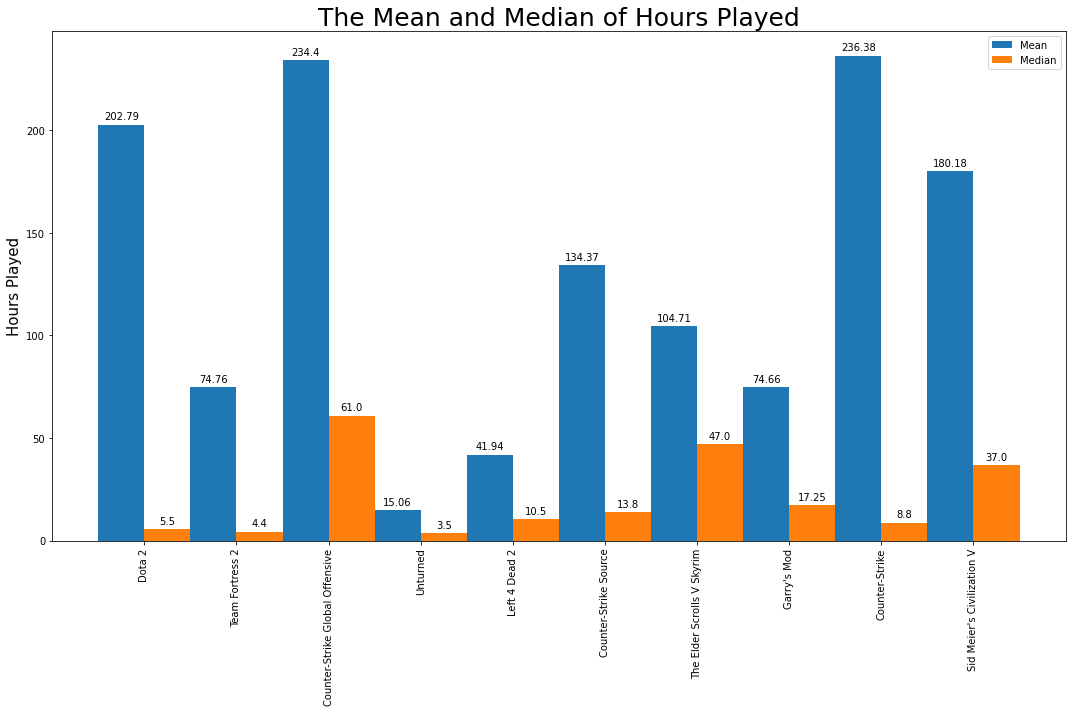

In [91]:
labels = list(final10['game'])
means = list(final10['mean'])
median = list(final10['median'])
x = np.arange(len(labels))
width = 0.5 
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, median, width, label='Median')
ax.set_ylabel('Hours Played', fontsize=15)
ax.set_title('The Mean and Median of Hours Played', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

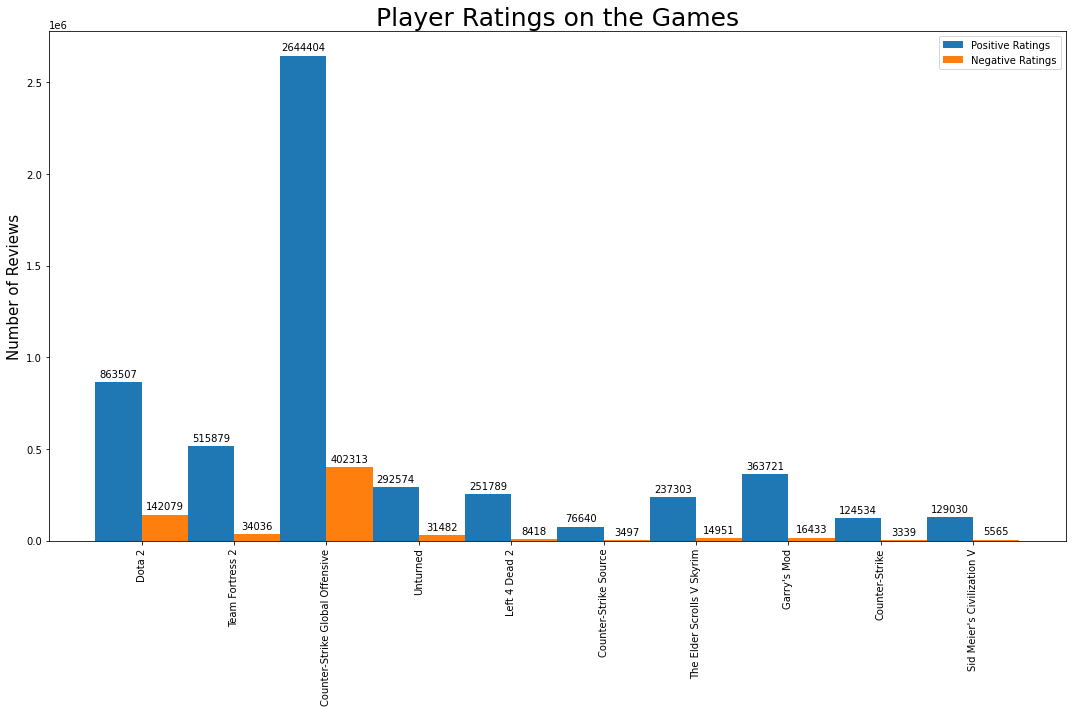

In [92]:
pos = list(final10['pos_rate'])
neg = list(final10['neg_rate'])
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, pos, width, label='Positive Ratings')
rects2 = ax.bar(x + width/2, neg, width, label='Negative Ratings')

ax.set_ylabel('Number of Reviews', fontsize=15)
ax.set_title('Player Ratings on the Games', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()